# t-Distributed Stochastic Neighbor Embedding (t-SNE)

This technique is extremely popular in the deep learning community. Unfortunately, t-SNE’s cost function involves some non-trivial mathematical machinery and requires some significant effort to understand.

But, roughly, what t-SNE tries to optimize for is preserving the topology of the data. For every point, it constructs a notion of which other points are its ‘neighbors,’ trying to make all points have the same number of neighbors. Then it tries to embed them so that those points all have the same number of neighbors.

In some ways, t-SNE is a lot like the graph based visualization. But instead of just having points be neighbors (if there’s an edge) or not neighbors (if there isn’t an edge), t-SNE has a continuous spectrum of having points be neighbors to different extents.

t-SNE is often very successful at revealing clusters and subclusters in data. Unfortunately, it is prone to getting stuck in local minima.

Visualizing data using t-SNE

L.v.d. Maaten, G. Hinton.

Journal of Machine Learning Research, Vol 9(Nov), pp. 2579—2605. 2008.

In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [2]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (70000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# [print(i) for i in df.iloc[0]]

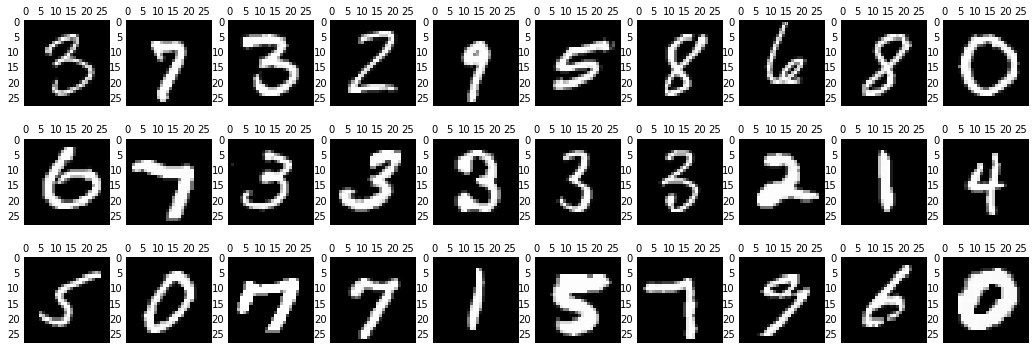

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(18,6) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


/usr/local/lib/python3.5/dist-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.5/dist-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


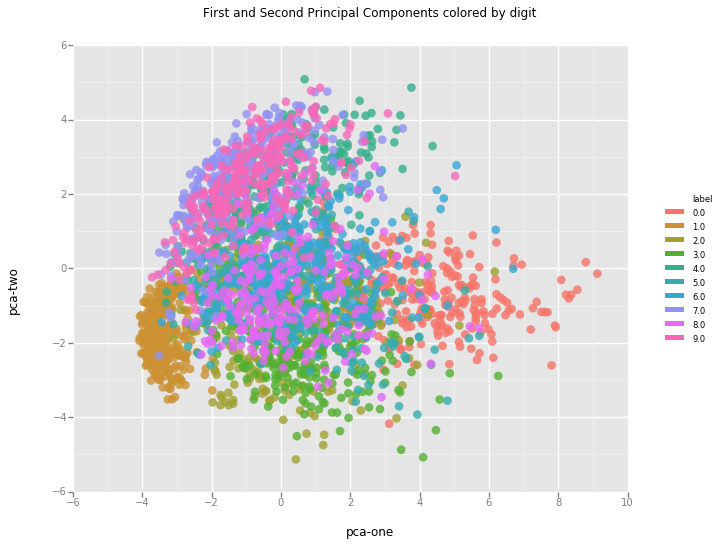

<ggplot: (8728919144368)>

In [8]:
from ggplot import *

chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart


In [9]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8253535484044372


In [13]:
pca_result_50[0]

array([ 3.96272158, -1.13711224,  2.25929704, -1.90228778, -3.29991512,
       -0.57045944, -0.1895427 , -0.40090625,  0.13641648,  0.59319623,
       -1.1086276 , -0.43179538, -1.29384383,  0.38040272,  0.88814663,
       -0.61199257, -0.19379126,  0.1487185 ,  0.24781817, -0.44500752,
        0.79436666, -0.36939818,  0.04984906,  0.11623774,  0.91709512,
        0.7722389 ,  0.07425799,  0.11128424, -1.42629342, -0.33155758,
        0.02743372, -0.3949175 ,  0.75667816,  0.34082078, -0.53930748,
        0.3090279 , -0.24085572,  0.01600372,  0.17168444,  0.32986977,
       -0.86046701, -0.25516492,  0.25500215, -0.69574509,  0.11512378,
       -0.63820703, -1.07572426, -0.52605791,  0.49847859, -0.03897496])

In [10]:
from sklearn.manifold import TSNE
import time

n_sne = 7000
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.024s...
[t-SNE] Computed neighbors for 7000 samples in 5.623s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 1.957983
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.676804
[t-SNE] Error after 300 iterations: 2.420160
t-SNE done! Time elapsed: 61.17372727394104 seconds


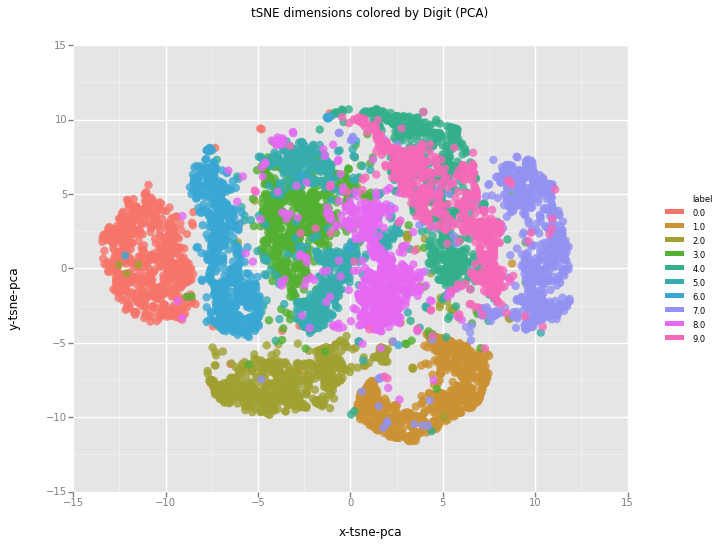

<ggplot: (-9223363307935696987)>

In [11]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=70,alpha=0.8) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart

![](https://d3ansictanv2wj.cloudfront.net/images/animation-94a2c1ff.gif)

Source: https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm

How to Use t-SNE Effectively
https://distill.pub/2016/misread-tsne/

![](Figures/sne-stats.png)

It’s easy to slip into a mind set of thinking one of these techniques is better than the others, but I think they’re all complementary. There’s no way to map high-dimensional data into low dimensions and preserve all the structure. So, an approach must make trade-offs, sacrificing one property to preserve another. PCA tries to preserve linear structure, MDS tries to preserve global geometry, and t-SNE tries to preserve topology (neighborhood structure).

These techniques give us a way to gain traction on understanding high-dimensional data. While directly trying to understand high-dimensional data with the human mind is all but hopeless, with these tools we can begin to make progress.



StatQuest: t-SNE, Clearly Explained (11 min)
https://www.youtube.com/watch?v=NEaUSP4YerM

http://colah.github.io/posts/2014-10-Visualizing-MNIST/

https://www.oreilly.com/learning/an-illustrated-introduction-to-the-t-sne-algorithm